This brief example shows how to use the isochrones package to extract an isochrone for a specific location and time. 

It assumes that 
* the isochrones package has been properly installed and additional dependencies (matplotlib, numpy) have been installed (e.g. with `pip install isochrones[example]`)
* OpenTripPlanner (OTP) is running locally on the 8080 port
* the OTP data is stored in the `otp/graphs/main` subfolder

In [19]:
from matplotlib import pyplot as plt
from matplotlib import colors as colors
import datetime
import numpy as np
import geopandas as gpd


from isochrones.isochrones import calculate_isochrones, intersect_isochrones

In [20]:
lat = 48.59
lon = 7.76
cutoffSec = [1800, 3600, 5400]
date_time = datetime.datetime(2022, 5, 20, 16, 0)
ssl = False
hostname = "localhost"
port = 8080
router = "main"

# Create a normalized colormap based on cutoffSec values
norm = colors.Normalize(vmin=min(cutoffSec), vmax=max(cutoffSec))
cmap = plt.cm.viridis

In [21]:
output = calculate_isochrones(
    lat, lon, cutoffSec, date_time, ssl, hostname, port, router
)

<Axes: >

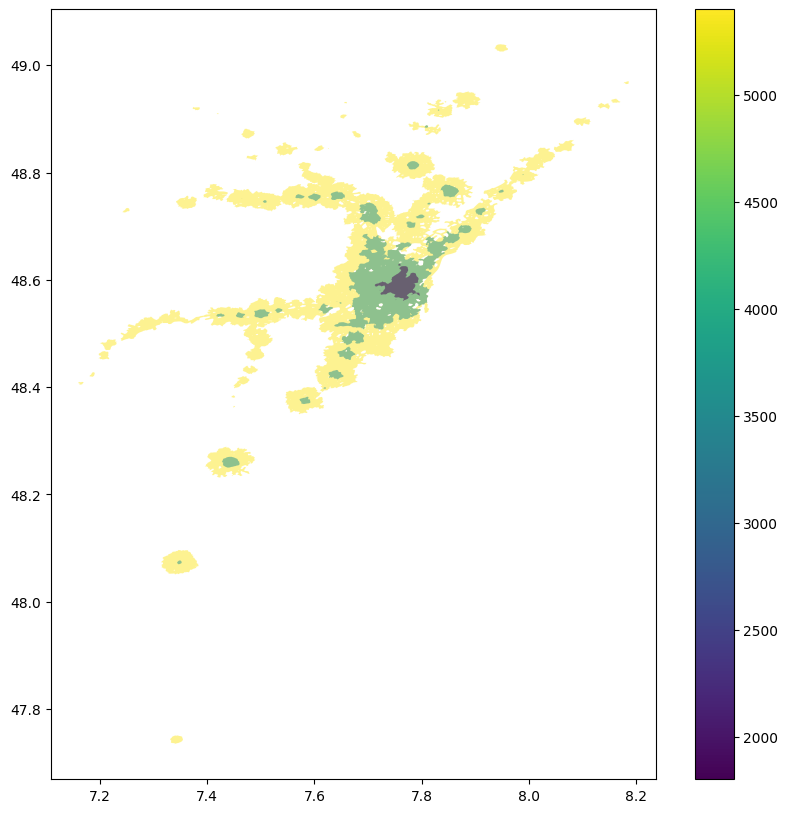

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))

output.plot(ax=ax, column="time", alpha=0.5, legend=True, cmap="viridis")

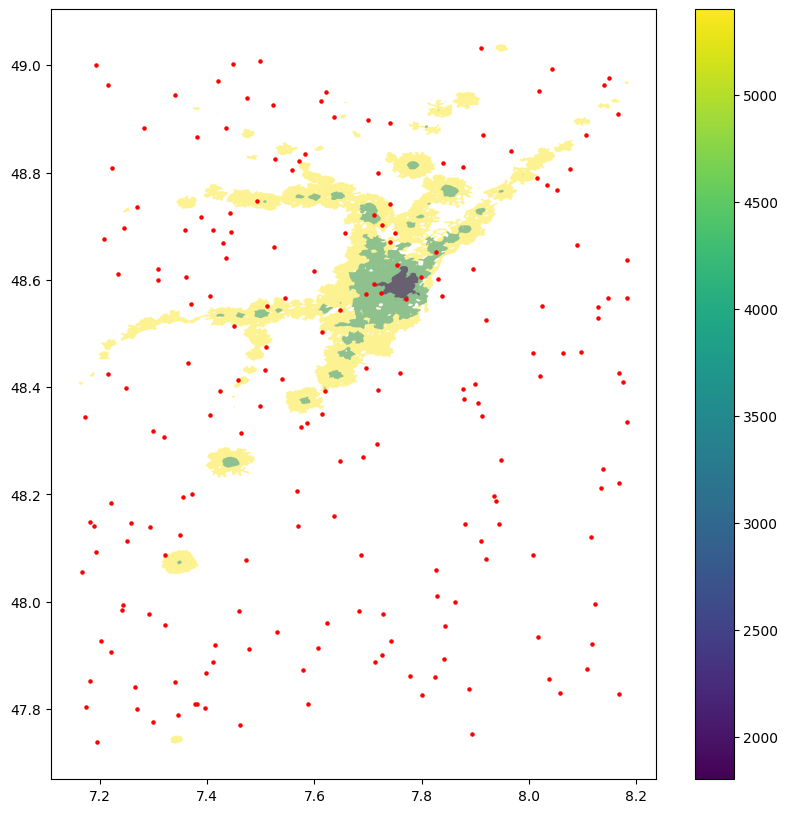

In [23]:
# Randomly sample points within the bounding box of the isochrones
# Set the seed
np.random.seed(81)

n_points = 200
minx, miny, maxx, maxy = output.total_bounds
random_points = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(
        np.random.uniform(minx, maxx, n_points), np.random.uniform(miny, maxy, n_points)
    )
)

fig, ax = plt.subplots(figsize=(10, 10))
output.plot(ax=ax, column="time", alpha=0.5, legend=True, cmap=cmap)
random_points.plot(ax=ax, color="red", markersize=5)

iso = plt.show()

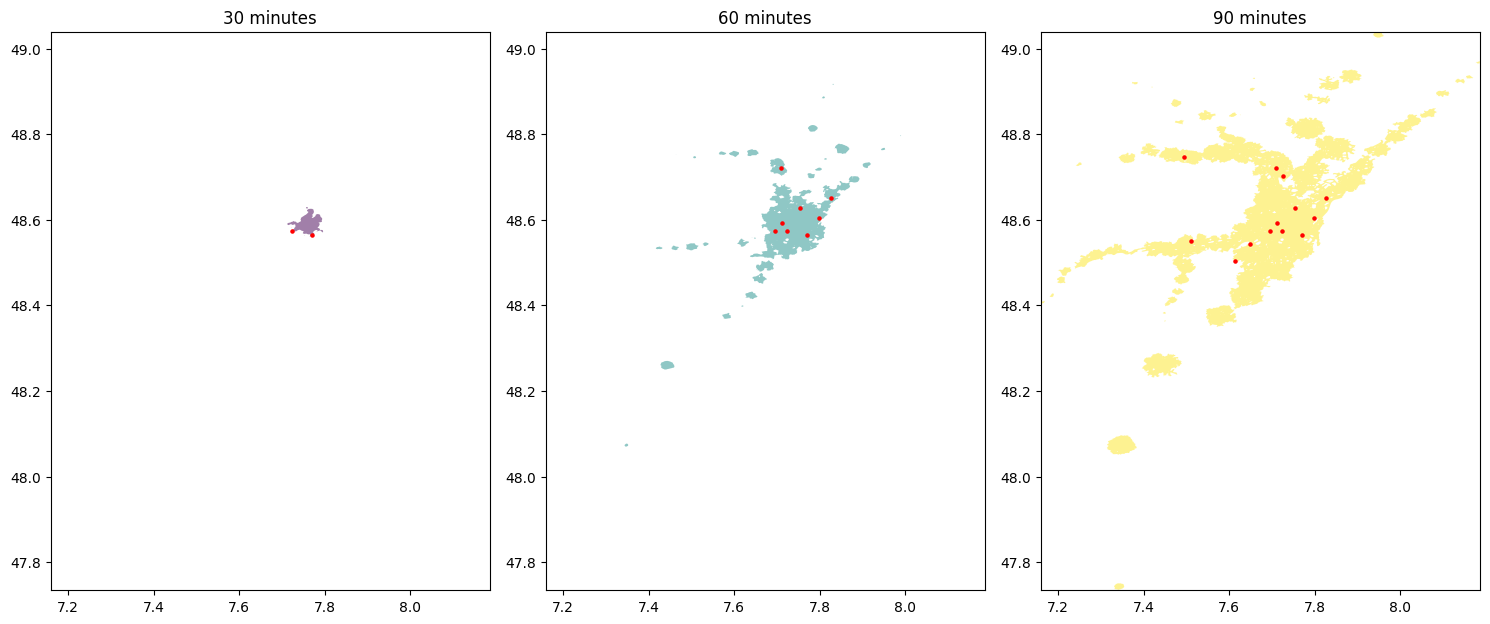

In [24]:
# Intersect the random points with each isochrones stored in the output
intersected_random = intersect_isochrones(output, random_points)

# Plot the results, with each isochrone in a separate subplot
fig, axes = plt.subplots(ncols=len(cutoffSec), figsize=(15, 10))

for ax, i in zip(axes, range(len(cutoffSec))):
    output_data = output[output["time"] == cutoffSec[i]]
    intersected_data = intersected_random[intersected_random["time"] == cutoffSec[i]]

    color = cmap(norm(cutoffSec[i]))
    output_data.plot(ax=ax, color=color, alpha=0.5, legend=True)

    if not intersected_data.empty:
        intersected_data.plot(ax=axes[i], color="red", markersize=5)

    # Set consistent bounds for each subplot
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)

    # Add title to show the time cutoff
    ax.set_title(f"{cutoffSec[i] / 60:.0f} minutes")

plt.tight_layout()
plt.show()